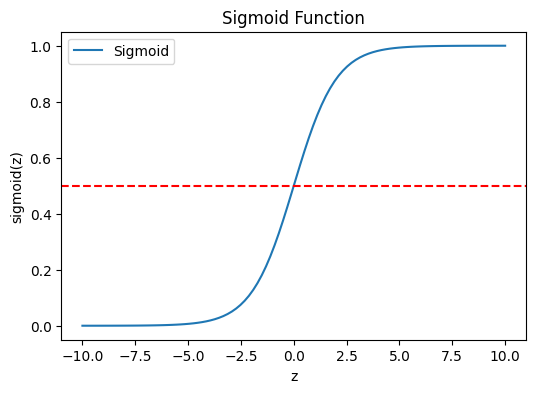

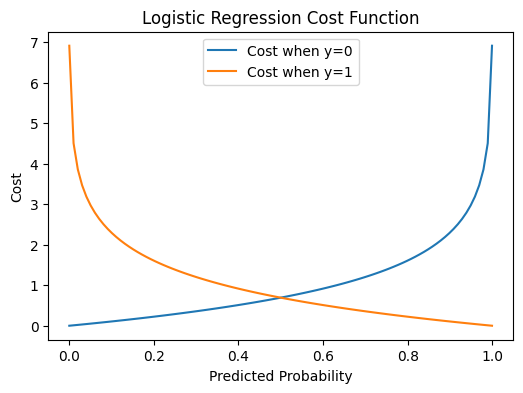

Theta (weights): [[-3.15295706  2.92549555]]
Theta (bias): [7.67098474]
Binary Classification Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



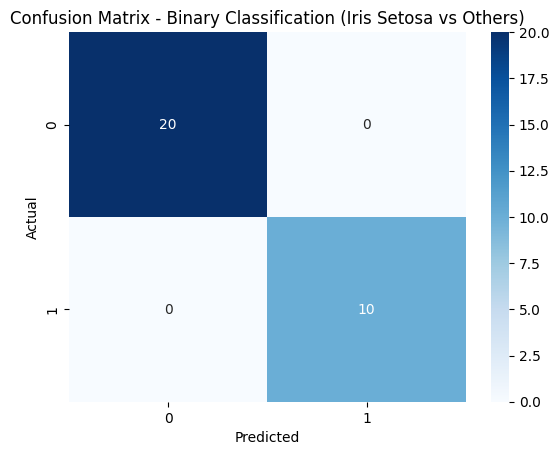

Binary Classification Feature Names: ['sepal length (cm)', 'sepal width (cm)']
Binary Classification Classes: ['Non-Setosa', 'Setosa']
Binary Classification Colors: ['red', 'green']


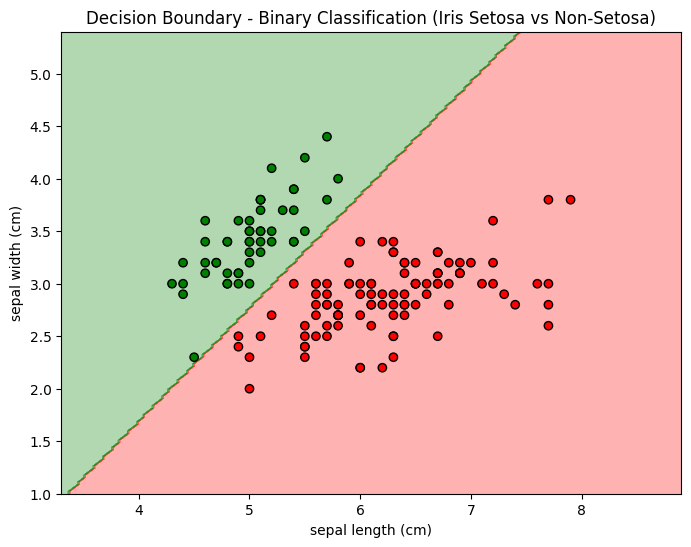

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Theta (weights):
 [[-0.39345607  0.96251768 -2.37512436 -0.99874594]
 [ 0.50843279 -0.25482714 -0.21301129 -0.77574766]
 [-0.11497673 -0.70769055  2.58813565  1.7744936 ]]
Theta (bias):
 [  9.00884295   1.86902164 -10.87786459]
Multiclass Classification Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



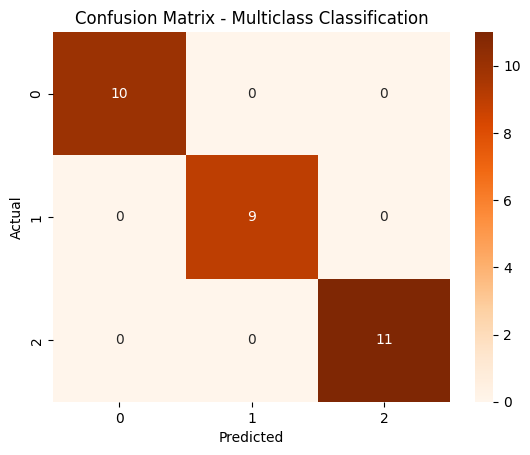

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multiclass Classification Feature Names: ['sepal length (cm)', 'sepal width (cm)']
Multiclass Classification Classes: ['setosa' 'versicolor' 'virginica']
Multiclass Classification Colors: ['red', 'green', 'blue']


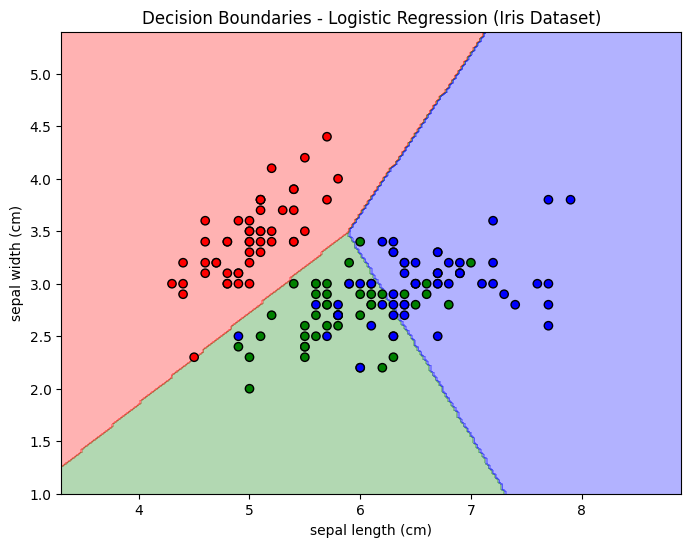

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib.colors import ListedColormap


# 1. Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(6,4))
plt.plot(z, sig, label='Sigmoid')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.axhline(0.5, color='r', linestyle='--')
plt.legend()
plt.show()

# 2. Cost Function Visualization
y_hat = np.linspace(0.001, 0.999, 100)
cost_0 = -np.log(1 - y_hat)  # if y = 0
cost_1 = -np.log(y_hat)      # if y = 1

plt.figure(figsize=(6,4))
plt.plot(y_hat, cost_0, label='Cost when y=0')
plt.plot(y_hat, cost_1, label='Cost when y=1')
plt.title("Logistic Regression Cost Function")
plt.xlabel("Predicted Probability")
plt.ylabel("Cost")
plt.legend()
plt.show()

# 3. Binary Classification (Iris Setosa vs Non-Setosa)
iris = load_iris()
X = iris.data[:, :2]  # first 2 features
y = (iris.target == 0).astype(int)  # Binary: Setosa=1, Others=0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
print("Theta (weights):", model.coef_)
print("Theta (bias):", model.intercept_)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Binary Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Binary Classification (Iris Setosa vs Others)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Boundary for Binary Classification
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors_binary = ['red','green']  # Corresponding to class 0 and 1
class_names_binary = ['Non-Setosa','Setosa']
features_binary = iris.feature_names[:2]

print("Binary Classification Feature Names:", features_binary)
print("Binary Classification Classes:", class_names_binary)
print("Binary Classification Colors:", colors_binary)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(colors_binary))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=ListedColormap(colors_binary))
plt.xlabel(features_binary[0])
plt.ylabel(features_binary[1])
plt.title("Decision Boundary - Binary Classification (Iris Setosa vs Non-Setosa)")
plt.show()

# 4. Multiclass Classification Example
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LogisticRegression(max_iter=5000, multi_class='multinomial')
multi_model.fit(X_train, y_train)
print("Theta (weights):\n", multi_model.coef_)
print("Theta (bias):\n", multi_model.intercept_)

# Predictions
y_pred_multi = multi_model.predict(X_test)

# Accuracy
print("Multiclass Classification Accuracy:", accuracy_score(y_test, y_pred_multi))
print("\nClassification Report:\n", classification_report(y_test, y_pred_multi))

# Confusion Matrix
cm_multi = confusion_matrix(y_test, y_pred_multi)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Multiclass Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5. Decision Boundary Visualization (2D features)
X_2d = iris.data[:, :2]  # first 2 features
y_2d = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)
model_2d = LogisticRegression(max_iter=5000, multi_class='multinomial')
model_2d.fit(X_train, y_train)

# Meshgrid
x_min, x_max = X_2d[:,0].min() - 1, X_2d[:,0].max() + 1
y_min, y_max = X_2d[:,1].min() - 1, X_2d[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors_multi = ['red','green','blue']  # class 0,1,2
class_names_multi = iris.target_names
features_multi = iris.feature_names[:2]

print("Multiclass Classification Feature Names:", features_multi)
print("Multiclass Classification Classes:", class_names_multi)
print("Multiclass Classification Colors:", colors_multi)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(colors_multi))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_2d, edgecolor='k', cmap=ListedColormap(colors_multi))
plt.xlabel(features_multi[0])
plt.ylabel(features_multi[1])
plt.title("Decision Boundaries - Logistic Regression (Iris Dataset)")
plt.show()
